In [ ]:
####Read the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
herum nata lu!
khai ta feri

sample_data


In [ ]:
!cd ..
!pwd

/content


In [ ]:
##Mount google drive to directly connect colab to the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
##read the file from the drive
df = pd.read_csv('/content/gdrive/Shareddrives/STRIDE_Projects/STRIDE_Travel_Behavior/Code/trafficproject.csv')

In [ ]:
df

,MAC_ID,BEGIN_DATE,Date5mins,BEGIN_TIME,END_DATE,DayofWeek,END_TIME,TravelTime (minute),TravelRate (minute/mile),BS_Flag,T-PeMS,Event
0,1FE4958128,1/25/2011,0:00,0:00:55,1/25/2011,2,0:06:26,5.517,0.985179,0,5.004599,Normal
1,1BAFD2DA5E,1/25/2011,0:00,0:03:29,1/25/2011,2,0:08:51,5.367,0.958393,0,5.004599,Normal
2,44F4594A9AD3,1/26/2011,0:00,0:00:58,1/26/2011,3,0:05:48,4.833,0.863036,0,4.926446,Weather
3,54FA06E59,1/26/2011,0:00,0:00:33,1/26/2011,3,0:06:25,5.867,1.047679,0,4.926446,Weather
4,405FBE875A6E,1/26/2011,0:00,0:01:12,1/26/2011,3,0:06:25,5.217,0.931607,0,4.926446,Weather
...,...,...,...,...,...,...,...,...,...,...,...,...
138328,1060D16C81,3/20/2011,23:55,23:56:01,3/21/2011,7,0:01:35,5.567,0.994107,0,NaN,Normal
138329,2490E31126,3/20/2011,23:55,23:58:59,3/21/2011,7,0:04:43,5.733,1.023750,0,NaN,Normal
138330,A096290E0B,3/21/2011,23:55,23:59:41,3/22/2011,1,0:05:40,5.983,1.068393,0,NaN,Normal
138331,D48890A1DF05,3/22/2011,23:55,23:58:17,3/23/2011,2,0:04:20,6.050,1.080357,0,NaN,Weather


In [ ]:
sns.set(rc = {'figure.figsize':(20,9)})

In [ ]:
sns.set_palette(sns.color_palette("hls", 8))

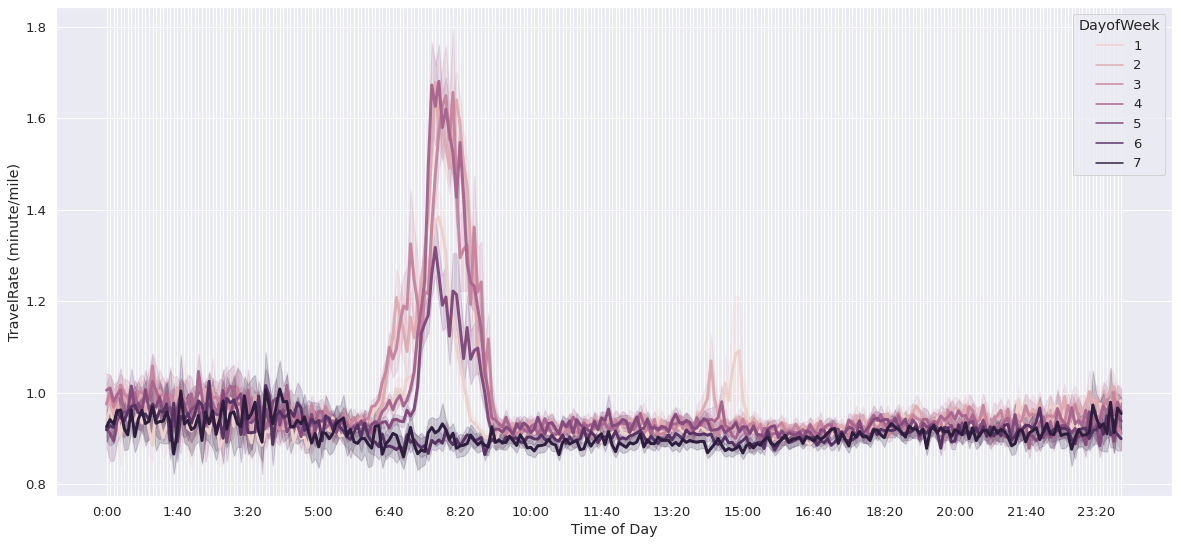

In [ ]:
##plot the travel times collected from  bluetooth detectors by day of week
flatui = ["red", "green", "orange", "blue", "brown", "black", "pink"]
sns.set_palette(flatui)
sns.set(font_scale = 1.2)
ax = sns.lineplot(data=df, x="Date5mins", y="TravelRate (minute/mile)", hue="DayofWeek", lw=3)
ax.set(xlabel='Time of Day')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax

In [ ]:
k = df[["TravelRate (minute/mile)","DayofWeek","Date5mins"]]

In [ ]:
s = pd.DataFrame(k)

In [ ]:
s

,TravelRate (minute/mile),DayofWeek,Date5mins
0,0.985179,2,0:00
1,0.958393,2,0:00
2,0.863036,3,0:00
3,1.047679,3,0:00
4,0.931607,3,0:00
...,...,...,...
138328,0.994107,7,23:55
138329,1.023750,7,23:55
138330,1.068393,1,23:55
138331,1.080357,2,23:55


In [ ]:
df9 = s['TravelRate (minute/mile)']
df9
df9 = pd.DataFrame(df9)

In [ ]:
#############K-MEANS CLUSTERING#####
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df9)
    distortions.append(kmeanModel.inertia_)

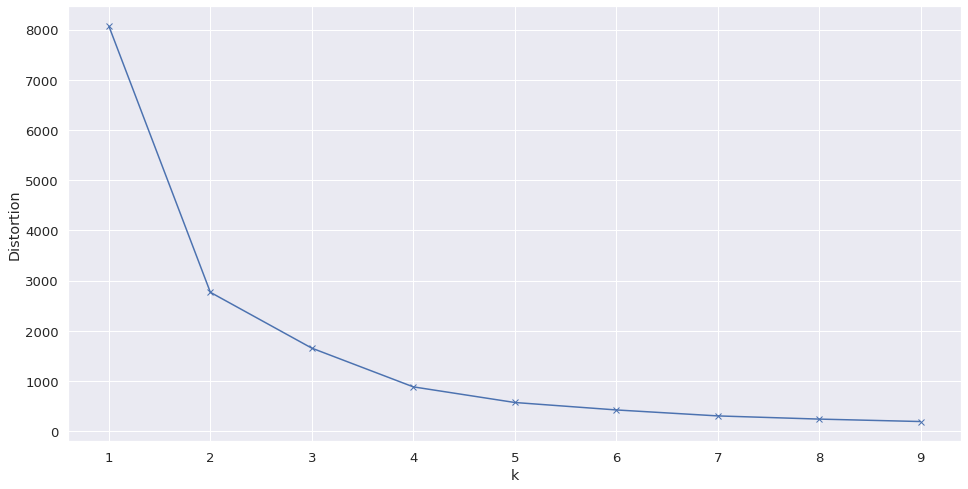

In [ ]:
########ELBOW METHOD TO SEE OPTIMUM NUMBER OF CLUSTERS########
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
#plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [ ]:
y_predict = km.fit_predict(df9[['TravelRate (minute/mile)']])

In [ ]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
s['cluster'] = y_predict

In [ ]:
s

,TravelRate (minute/mile),DayofWeek,Date5mins,cluster
0,0.985179,2,0:00,0
1,0.958393,2,0:00,0
2,0.863036,3,0:00,0
3,1.047679,3,0:00,0
4,0.931607,3,0:00,0
...,...,...,...,...
138328,0.994107,7,23:55,0
138329,1.023750,7,23:55,0
138330,1.068393,1,23:55,0
138331,1.080357,2,23:55,0


In [ ]:
s.cluster.value_counts()

0    132294
1      6039
Name: cluster, dtype: int64

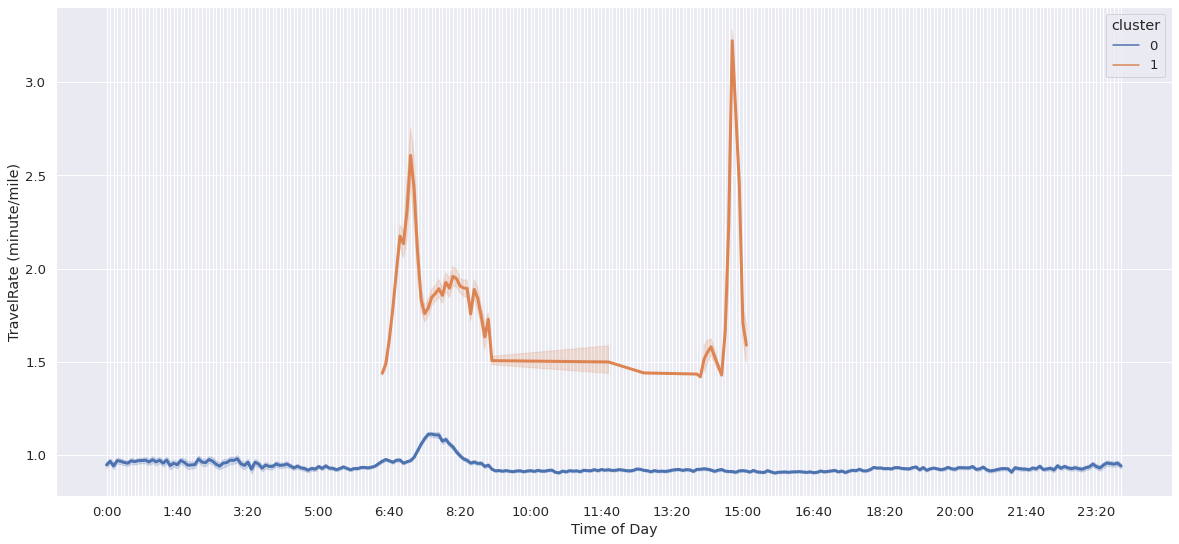

In [ ]:
############PLOT TRAVEL TIMES BELONGING TO THE TWO CULSTERS##########
flatui = ["red", "green", "orange", "blue", "brown", "black", "pink"]
sns.set_palette(flatui)
sns.set(font_scale = 1.2)
ax = sns.lineplot(data=s, x="Date5mins", y="TravelRate (minute/mile)", hue="cluster", lw=3)
ax.set(xlabel='Time of Day')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
i = [1,2,3,4,5,6,7,8,9]

Since silhouette score for k= 3 is 0.796 which is greater than 0.62 for k=4


In [ ]:
############CHECK THE SILHOUETTE SCROES###########
silhouette_score(df9,y_predict) #0.85 for 2. # 0.62 for 4,

0.8572802420872147

In [ ]:
s.to_csv('/content/gdrive/Shareddrives/STRIDE_Projects/STRIDE_Travel_Behavior/Code/TTR/clusters.csv')

In [ ]:
cluster0 = s[s.cluster == 0]
cluster0

,TravelRate (minute/mile),DayofWeek,Date5mins,cluster
0,0.985179,2,0:00,0
1,0.958393,2,0:00,0
2,0.863036,3,0:00,0
3,1.047679,3,0:00,0
4,0.931607,3,0:00,0
...,...,...,...,...
138328,0.994107,7,23:55,0
138329,1.023750,7,23:55,0
138330,1.068393,1,23:55,0
138331,1.080357,2,23:55,0


In [ ]:
cluster0.to_csv('/content/gdrive/Shareddrives/STRIDE_Projects/STRIDE_Travel_Behavior/Code/TTR/cluster0kmeans2.csv')

In [ ]:
cluster1 = s[s.cluster == 1]
cluster1

,TravelRate (minute/mile),DayofWeek,Date5mins,cluster
16921,1.427143,2,6:30,1
16922,1.450893,2,6:30,1
17778,1.482143,2,6:35,1
17779,1.479107,2,6:35,1
17780,1.431607,2,6:35,1
...,...,...,...,...
91888,1.824464,1,15:05,1
91889,1.628036,1,15:05,1
91890,1.565536,1,15:05,1
91891,1.482143,1,15:05,1


In [ ]:
cluster1.to_csv('/content/gdrive/Shareddrives/STRIDE_Projects/STRIDE_Travel_Behavior/Code/TTR/cluster1kmeans2.csv')